# Pandas homework

## Task 1

The file ./data/train.csv contains information about the number of reads with each of the 4 nucleotides at different positions (columns A, T, G, C). The task is to plot a histogram of the distribution of these numbers

In [1]:
import pandas as pd # import pandas
train_data = pd.read_csv('train.csv') # read the data
train_data.head() # view the data structure

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


In [2]:
hist_data = train_data[['pos', 'A', 'C', 'T', 'G']] # chose the required columns
hist_data = hist_data.fillna(0) # replace NaN with 0

<AxesSubplot:xlabel='Position'>

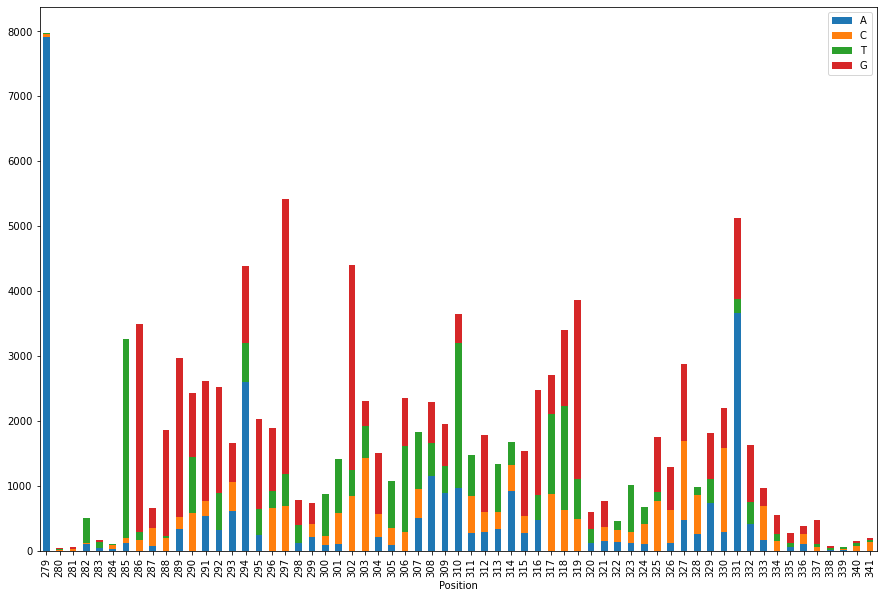

In [3]:
hist_data.plot.bar(x = 'pos', figsize = [15, 10], stacked = True, xlabel = 'Position') # plotting